## Solution
The creation of the model will be carried out according to the following plan


1.   Features analysis
2.   Classification
3.   Quality Assessment 

## 1. Feature Analysis

For a better understanding of the problem, let's turn to the primary source - the article by Johnson et al. 

The study area for this article was a forested area in Ibaraki Prefecture, Japan, approximately 13 km × 12 km. The landscape consists mainly
of Cryptomeria japonica (Sugi, or Japanese Cedar) planted forest, Chamaecyparis obtusa (Hinoki, or Japanese Cypress) planted forest and mixed deciduous broadleaf natural forest, with a small amount of other land use/land cover types scattered throughout the image (agriculture, roads, buildings and so on).

Orthorectified ASTER imagery was acquired for three dates in different seasons (26 September 2010, 19 March 2011 and 8 May 2011) to provide adequate spectral **discrimination between coniferous and deciduous tree species**)

<img src="forest.png">
26 September 2010, 19 March 2011 and 8 May 2011 ASTER false colour
composite images of the study area located in Ibaraki Prefecture, Japan, with the study area indicated by the black lines

The dataset contains basic features b1-b9 that are the spectral values
(pixel brightness values) in the green, red, and near infrared wavelengths.

The columns are marked with symbols b1-b9. It is logical to assume that the first three values ​​are measurements in September, the second three values ​​are in March and the last three values ​​are in May; Columns b1, b4, b7 are green, b2, b5, b8 are red, b3, b6, b9 are near infrared.

Let's check it on the data. Conifers (sugi and hinoki) must be green at all seasons, so there must be a high correlation between b1, b4, b7. Broadleaf trees should be green in September and May, but leafless in March. Therefore, there must be a high correlation between b1 and b7. For other objects on the map, the correlation of green color should not vary greatly with the season.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
import numpy as np

In [2]:
df = pd.read_csv('training.csv')
base_col = ['b1','b2','b3','b4','b5','b6','b7','b8','b9']
green_col = ['b1','b4','b7']
red_col = ['b2','b5','b8']
nir_col = ['b3','b6','b9']

Encoding class

In [3]:
df['c'] = LabelEncoder().fit_transform(df['class'])

Average spectral values 

In [4]:
df['green']=(df['b1']+df['b4']+df['b7'])/3
df['red']=(df['b2']+df['b5']+df['b8'])/3
df['nir']=(df['b3']+df['b6']+df['b9'])/3
df

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9,c,green,red,nir
0,d,67,51,68,115,69,111,136,31,67,...,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11,0,106.000000,50.333333,82.000000
1,s,67,28,51,99,50,97,82,26,59,...,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57,3,82.666667,34.666667,69.000000
2,s,63,26,50,95,49,91,81,26,57,...,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85,3,79.666667,33.666667,66.000000
3,d,63,42,63,97,66,108,111,28,59,...,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52,0,90.333333,45.333333,76.666667
4,s,46,27,50,83,51,90,76,26,56,...,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32,3,68.333333,34.666667,65.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,o,55,56,72,91,79,113,86,35,68,...,-27.52,-1.04,-4.73,-22.85,-1.49,-4.10,2,77.333333,56.666667,84.333333
321,d,69,49,76,91,52,91,92,25,57,...,-16.90,-0.78,-4.15,-11.13,-1.48,-3.55,0,84.000000,42.000000,74.666667
322,s,49,26,48,107,59,104,62,22,53,...,-26.98,-1.36,-4.81,-24.50,-2.53,-4.97,3,72.666667,35.666667,68.333333
323,s,55,26,52,92,55,98,65,23,56,...,-25.53,-1.21,-4.70,-24.39,-2.21,-4.72,3,70.666667,34.666667,68.666667


Datasets for different classes

In [5]:
df_sugi = df[df['class'] == 's ']
df_hinoki = df[df['class'] == 'h ']
df_coniferous = df[(df['class'] == 's ') | (df['class'] == 'h ')]
df_deciduous = df[(df['class'] == 'd ')]
df_other = df[(df['class'] == 'o ')]

The difference beetwin conferious trees and other objects is better seen in red spectrum.

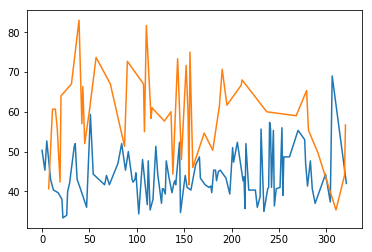

In [6]:
df_deciduous.red.plot()
df_other.red.plot()

The difference beetwin coniferous trees and deciduous trees also is better seen in red spectrum.

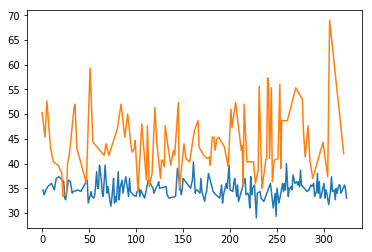

In [7]:
df_coniferous.red.plot()
df_deciduous.red.plot()

The difference beetwin sugi trees and hinoki trees also is better seen in green spectrum.

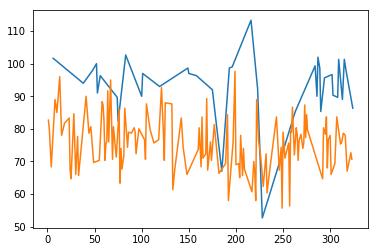

In [11]:
df_hinoki.green.plot()
df_sugi.green.plot()

## Correlation Analysis of basic features

Let us find the correlation between all basic variables

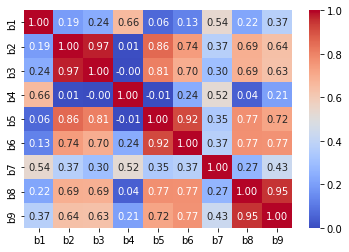

In [12]:
sns.heatmap(df[base_col].corr(), annot = True, cmap= 'coolwarm',fmt='.2f',vmin=0,vmax=1)

When analyzing the correlation for all classes, we see that a high correlation is observed between variables b2 and b3, b5 and b6, b8 and b9. Apparently this is due to the fact that measurements in the red and near-infrared spectra give similar results. Let's see how the correlation changes for coniferous and deciduous forests.

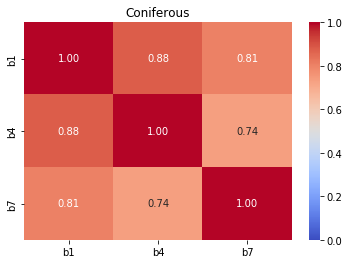

In [13]:
plt.title('Coniferous')
sns.heatmap(df_coniferous[green_col].corr(), annot = True, cmap= 'coolwarm',fmt='.2f',vmin=0,vmax=1)

For coniferous forests, the correlation in the green spectrum is high at all seasons.

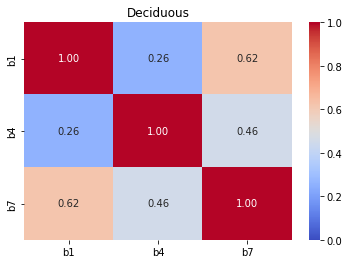

In [14]:
plt.title('Deciduous')
sns.heatmap(df_deciduous[green_col].corr(), annot = True, cmap= 'coolwarm',fmt='.2f',vmin=0,vmax=1)

Broadleaf forests have the lowest correlation between September (b1) and March (b4) in the green spectrum, which confirms our assumption. However, the correlation between September (b1) and May (b7) was not very high ($r=0.62$), which can be explained by the large differences in the color of broadleaf trees.

In [15]:
df[['green','red','nir']].corr()

,green,red,nir
green,1.000000,0.246331,0.339896
red,0.246331,1.000000,0.975513
nir,0.339896,0.975513,1.000000


## Additional features

In the provided study, a Inverse Distance Weighting (IDW) spatial interpolation technique was used to predict the spectral values for two land cover classes based on the spectral values of their training samples.
For each pixel, the similarities between the IDW-predicted spectral values for a given class and the actual spectral values of the pixel were used as additional inputs for image classification.
IDW is a spatial interpolation method that considers the values of nearby samples to
predict the value at a given location (Lam 1983)

* pred_minus_obs_S_b1 - pred_minus_obs_S_b9: Predicted spectral values (based on spatial interpolation) minus actual spectral values for the 's' class (b1-b9). 
* pred_minus_obs_H_b1 - pred_minus_obs_H_b9: Predicted spectral values (based on spatial interpolation) minus actual spectral values for the 'h' class (b1-b9).

Obviously, the prediction error should be close to zero. Let's plot the variables pred_minus_obs_H_b1 - pred_minus_obs_H_b9 for hinoki class.


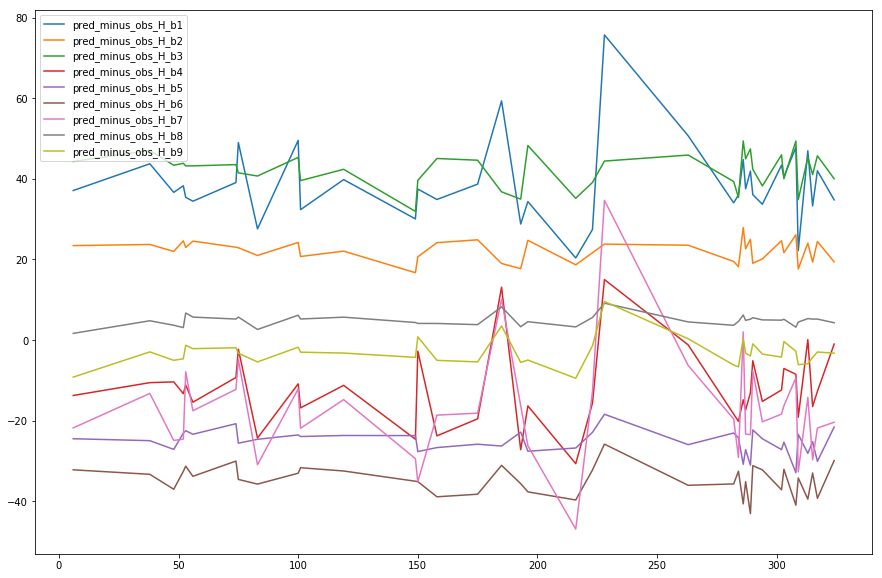

In [16]:
for i in range(1,10):
  df_hinoki['pred_minus_obs_H_b'+str(i)].plot(figsize=(15,10),legend=True)

We can see that prediction error is biased from zero. Let's plot the variables pred_minus_obs_S_b1 - pred_minus_obs_S_b9.


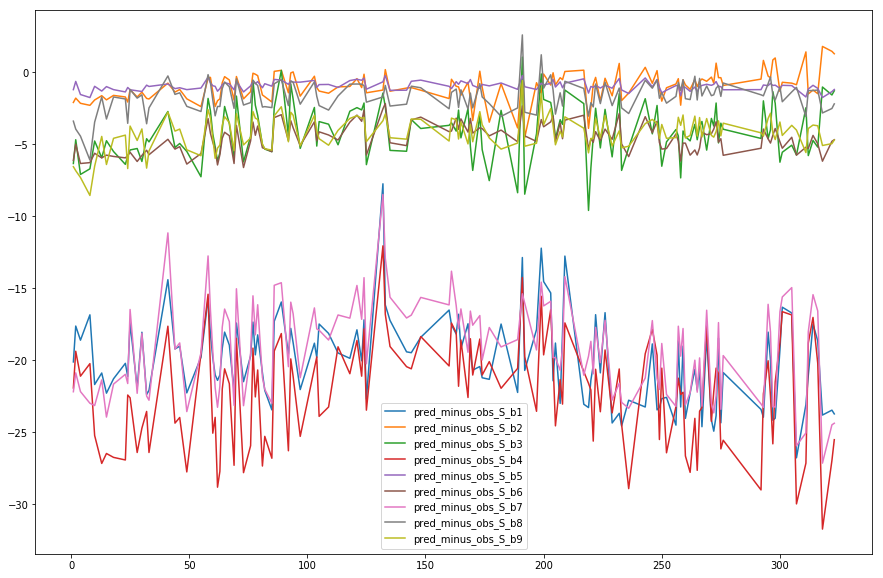

In [17]:
for i in range(1,10):
  df_sugi['pred_minus_obs_S_b'+str(i)].plot(figsize=(15,10),legend=True)

The prediction error for sugi class is also biased from zero

Conclusion: prediction error is very large. In this situation, we need to carefully check the data source. Since this is a tutorial example, it is better **do not use this data pred_minus_obs_S_b1 - pred_minus_obs_S_b9 and pred_minus_obs_H_b1 - pred_minus_obs_H_b9** to build a classification model.

# Visualisation

Let us consider the points from dataset in different projections.

In [8]:
import umap
import seaborn as sns

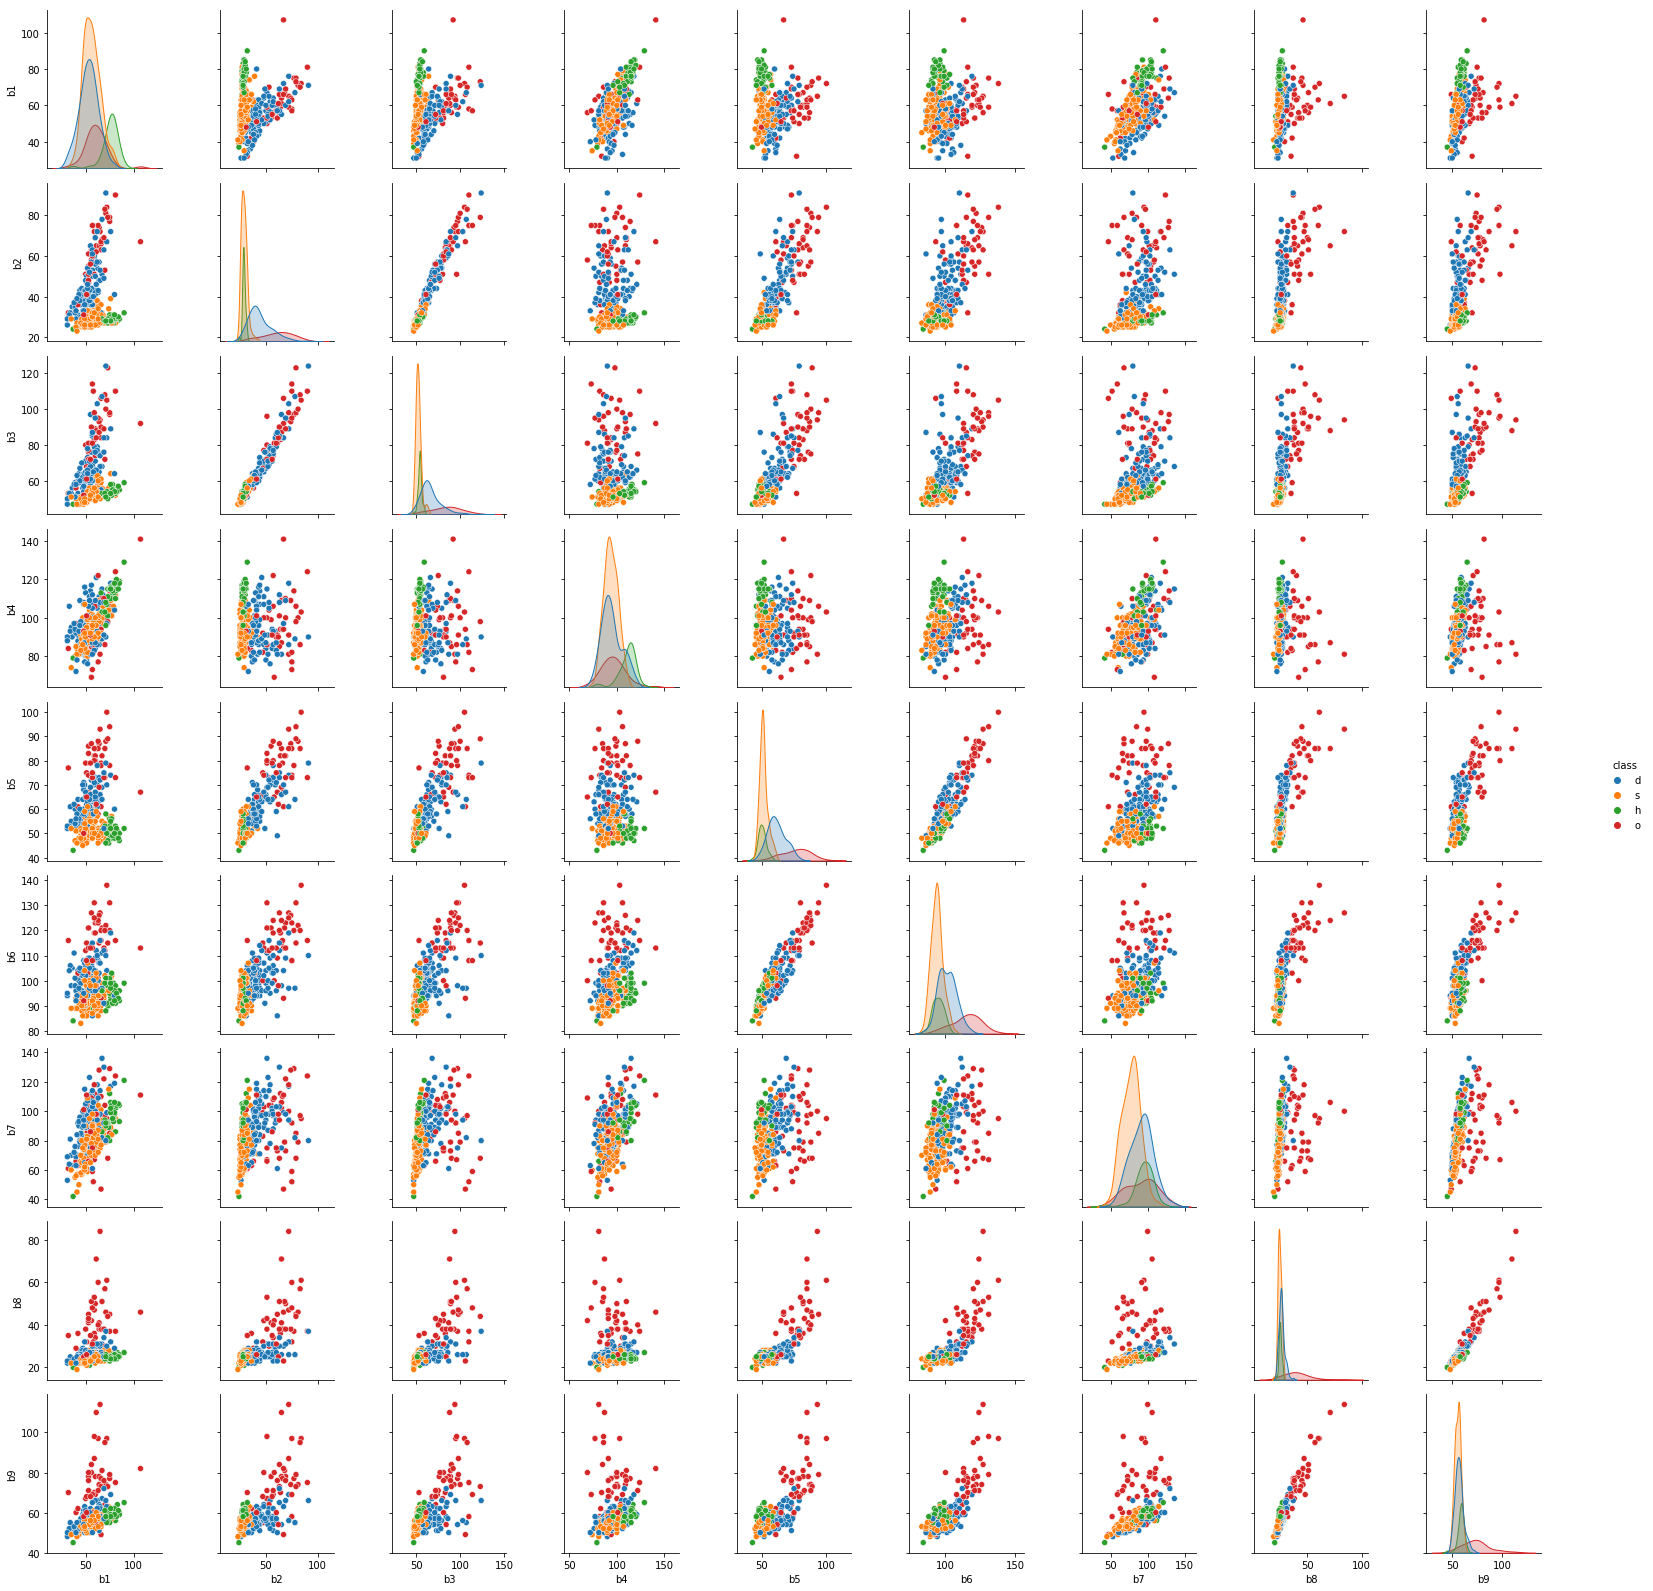

In [9]:
sns.pairplot(df, hue='class',vars=base_col)

In 2d projections classification problem is not seems easy. Let us look at linear and non-linear projection to 2d space using PCA and UMAP methods.

In [10]:
y = df['c']
x = df[base_col]

In [11]:
from sklearn.decomposition import PCA

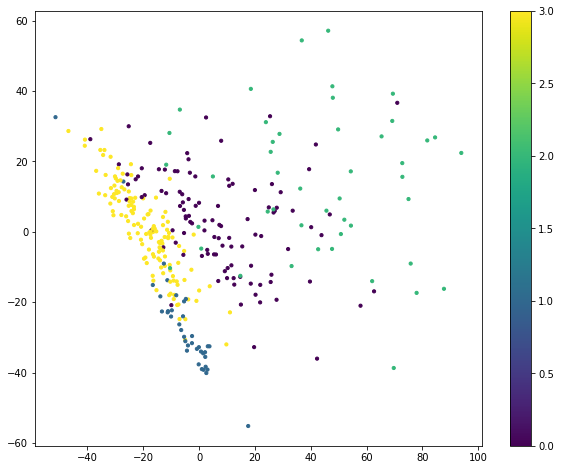

In [21]:
pca_transformed = PCA(n_components=2).fit_transform(x)
plt.figure(figsize=(10, 8))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], s=10, c=y)
plt.colorbar()

In linear projection points are mixed, let us try non-linear projection.

In [22]:
umap_transformed = umap.UMAP(n_epochs=200).fit_transform(x, y)

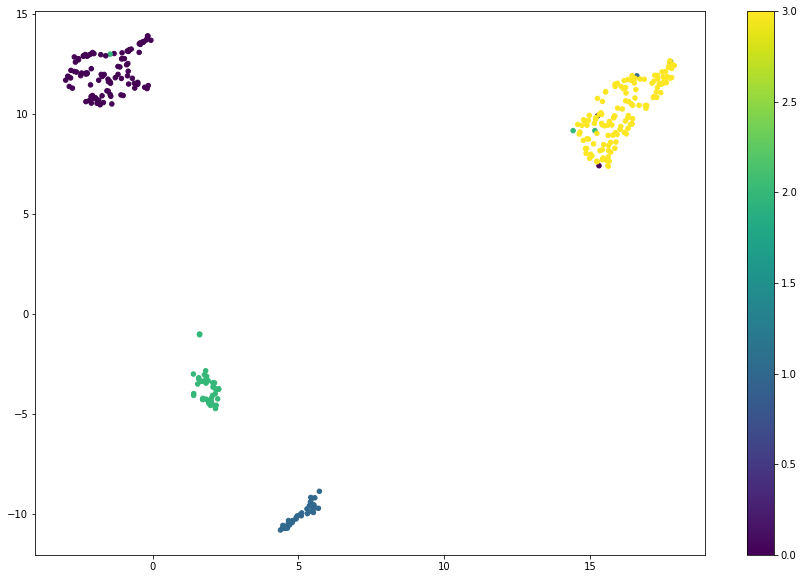

In [24]:
plt.figure(figsize=(15, 10))
plt.scatter(umap_transformed[:, 0], umap_transformed[:, 1],s=20,c=y)
plt.colorbar();

Non-linear transformation shows 4 clusters with small number of errors. 

# Classification model
In contrast of athors of original paper we will use gradient boosting classifier. At first find the optimal parametrs using cross-validation. 

In [25]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [27]:
def class_score(y_test, y_pred, names):
  confusion = confusion_matrix(y_test, y_pred)
  print('Confusion Matrix\n')
  print(confusion)

  #importing accuracy_score, precision_score, recall_score, f1_score
  print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

  print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
  print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
  print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

  print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
  print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
  print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

  print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
  print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
  print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

  print('\nClassification Report\n')
  print(classification_report(y_test, y_pred, target_names=names))

In [28]:
x_train = df[base_col]
y_train = df['c']

Fitting 5 folds for each of 49 candidates, totalling 245 fits


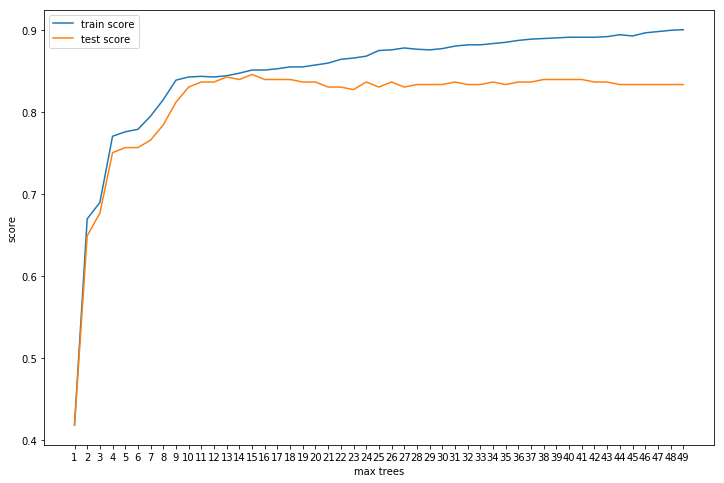

In [29]:
params = {'n_estimators': [i for i in range(1,50,1)], 'max_depth': [1]}
gs = GridSearchCV(GradientBoostingClassifier(), params, scoring = 'accuracy' ,n_jobs=-1, return_train_score=True, verbose=1, cv=5)
gs.fit(x_train, y_train)
results_frame = pd.DataFrame(gs.cv_results_)
_, ax = plt.subplots()
#ax.set_xscale('log')
ax.set_xticks(results_frame['param_n_estimators'].unique().tolist())
ax.set_xticklabels(results_frame['param_n_estimators'].unique().tolist())
results_frame.plot(x='param_n_estimators', y=['mean_train_score', 'mean_test_score'], ax=ax, xlabel='max trees',
                   ylabel='score', label=['train score', 'test score'], figsize=(12, 8))

After 15 steps gradient boosting is overfitted. So we will use this parameter for our model

In [30]:
clf = GradientBoostingClassifier(n_estimators=15, learning_rate=1.0,
      max_depth=1, random_state=0).fit(x_train, y_train)

y_pred = clf.predict(x_train)
class_score(y_train, y_pred, ['D', 'H', 'D', 'S'])


Confusion Matrix

[[100   1   1   3]
 [  0  33   0   5]
 [  8   0  37   1]
 [  5   1   0 130]]

Accuracy: 0.92

Micro Precision: 0.92
Micro Recall: 0.92
Micro F1-score: 0.92

Macro Precision: 0.93
Macro Recall: 0.90
Macro F1-score: 0.91

Weighted Precision: 0.93
Weighted Recall: 0.92
Weighted F1-score: 0.92

Classification Report

              precision    recall  f1-score   support

           D       0.88      0.95      0.92       105
           H       0.94      0.87      0.90        38
           D       0.97      0.80      0.88        46
           S       0.94      0.96      0.95       136

    accuracy                           0.92       325
   macro avg       0.93      0.90      0.91       325
weighted avg       0.93      0.92      0.92       325



In [31]:
pd.DataFrame(index=clf.feature_names_in_, data= clf.feature_importances_).sort_values(by=0, ascending=False)

,0
b2,0.447718
b8,0.232617
b1,0.178618
b7,0.055160
b5,0.032355
b4,0.025660
b9,0.021877
b6,0.003902
b3,0.002093


Accuracy is equal 0.92, that is more than the accuracy in the original paper. The most important feature are b2, b8, and b1. Let us check accuracy in the test data.

In [32]:
df_test = pd.read_csv('testing.csv')
x_test = df_test[base_col]
df_test['c'] = LabelEncoder().fit_transform(df_test['class'])
y_test = df_test['c']

y_pred = clf.predict(x_test)
class_score(y_test, y_pred, ['S', 'H', 'D', 'O'])

Confusion Matrix

[[52  0  2  0]
 [ 0 39  0  9]
 [ 5  1 31  0]
 [ 0  2  1 56]]

Accuracy: 0.90

Micro Precision: 0.90
Micro Recall: 0.90
Micro F1-score: 0.90

Macro Precision: 0.90
Macro Recall: 0.89
Macro F1-score: 0.90

Weighted Precision: 0.90
Weighted Recall: 0.90
Weighted F1-score: 0.90

Classification Report

              precision    recall  f1-score   support

           S       0.91      0.96      0.94        54
           H       0.93      0.81      0.87        48
           D       0.91      0.84      0.87        37
           O       0.86      0.95      0.90        59

    accuracy                           0.90       198
   macro avg       0.90      0.89      0.90       198
weighted avg       0.90      0.90      0.90       198



Accuracy is equal 0.9, a liitle less than in the test data.

# Conclusion

The classification model was developed to determine the type of surface with acceptable accuracy. The most important variables were the spectral value in the red spectrum in September and May and the spectral value in the green spectrum in September.

This result is consistent with preliminary analysis showing that the differences between coniferous forests and other objects are in the green spectrum, and the differences between hinoki and sugi are in the green spectrum.

The classification accuracy were 0.92 on the training and 0.9 on the test dataset when using gradient boosting. This is quite a lot, considering how much the points of different classes are mixed, also, data markup errors are possible in some cases.

Unfortunately, when constructing the model, we had to abandon additional variables that contain deviations of the predicted spectral values ​​based on spatial interpolation. I do not fully understand the reason for such large deviations of predictions from the true values, therefore, without specifying the reasons for these deviations, it is undesirable to use them in the classification model.